In [7]:
using Random
using CairoMakie

In [35]:
function Weibull(k, λ)
    function sample(dims...)
        F = rand(dims...)
        return @. λ*(-log(1-F))^(1/k)
    end
end

Weibull (generic function with 1 method)

In [125]:
cumsum([1, 2, 3])

3-element Vector{Int64}:
 1
 3
 6

In [275]:
randw_ages = Weibull(50, 350)
randw_births = Weibull(50, 350 / 400)
N = 100000
initial_packets = 400
initial_insertion_time = cumsum(sort(randw_births(initial_packets)))
initial_ages = sort(randw_ages(initial_packets)) - initial_insertion_time
ages = sort(randw_ages(N))
birth_intervals = sort(randw_births(N))
births = cumsum(birth_intervals)

100000-element Vector{Float64}:
     0.6813182612183547
     1.3864738357843034
     2.095779005219847
     2.8110839940972845
     3.5303955252987476
     4.252166932720878
     4.977187150708209
     5.707079750887781
     6.438374384215404
     7.170191887976303
     7.902557678361311
     8.635004762604352
     9.367524838546776
     ⋮
 86506.66445605733
 86507.57985868957
 86508.49579727677
 86509.41198186584
 86510.32832833102
 86511.24485022249
 86512.16176085174
 86513.0788421316
 86513.99634674206
 86514.9139294926
 86515.83232791719
 86516.75976206825

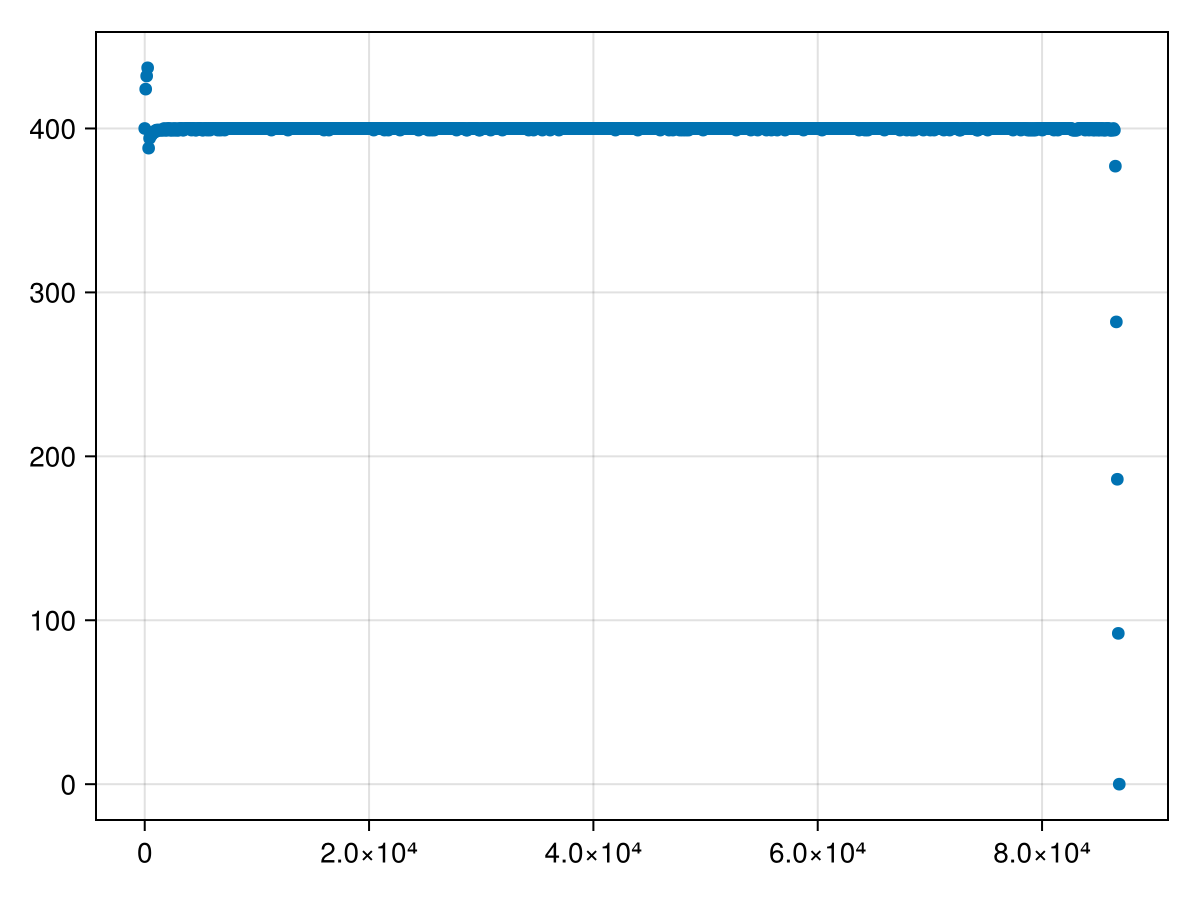

In [276]:
T = maximum(births + ages)
N = 1000
dt = T/N
times = 0:dt:T
N_packets = zeros(size(times))
i = 1
for t=times
    N_packets[i] = sum(initial_ages .> t) + sum((births .< t) .& ((births + ages) .> t))
    i += 1
end

plot(times, N_packets)

In [277]:
sum(ages) / length(ages)

346.0532682796282

In [ ]:
avg_packet_age = 350
mortality_factor = 50
queue_length 